In [375]:
import cv2
from PIL import Image, ImageFilter
import numpy as np
from matplotlib import pyplot as plt
import copy

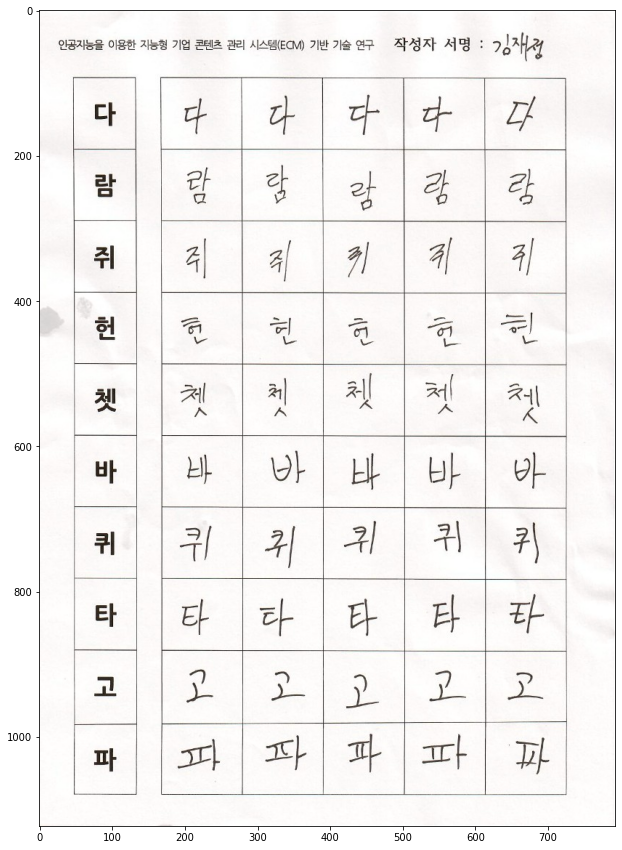

In [376]:
img_original = cv2.imread('testt.png')
plt.figure(figsize = (15, 15))
plt.imshow(img_original)

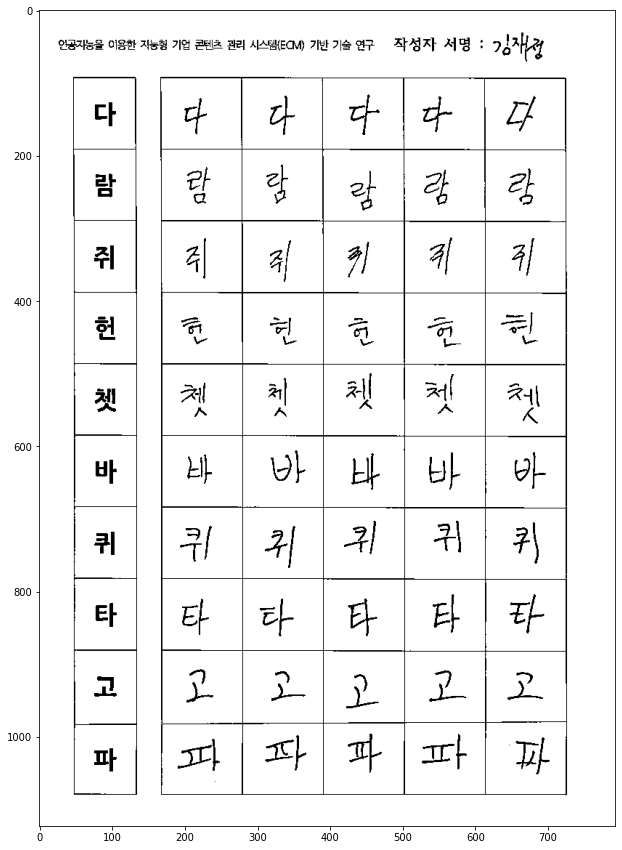

In [377]:
img_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
thresh1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 30)
plt.figure(figsize = (15,15))
plt.imshow(thresh1, cmap = 'gray')

In [378]:
img_original = cv2.imread('testt.png')
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

x, y, w, h = cv2.boundingRect(contours[1])

x, y, w, h


(166, 91, 562, 991)

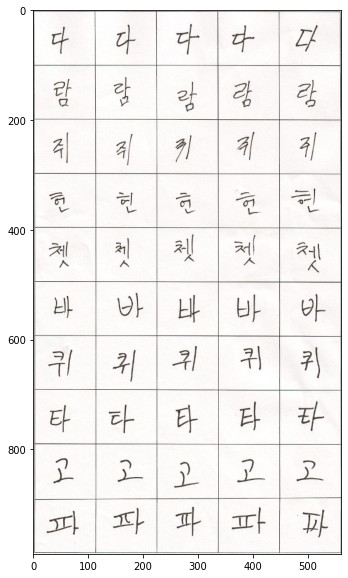

In [379]:
img_trim = img_original[y:y+h, x:x+w]
plt.figure(figsize = (10,10))
plt.imshow(img_trim, cmap = 'gray')

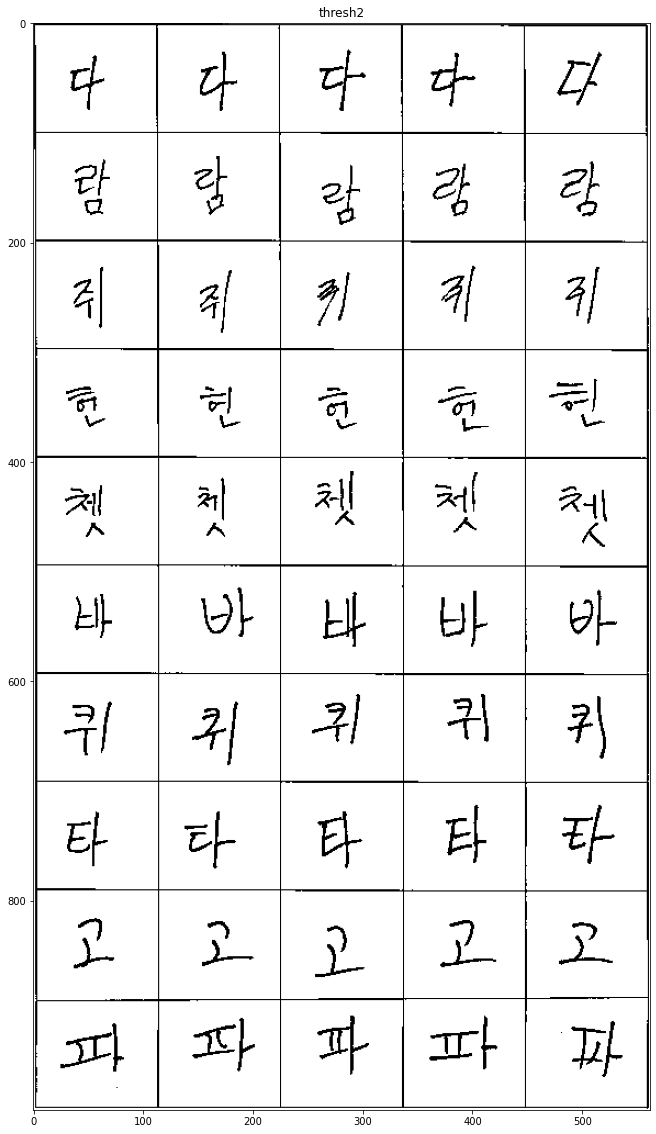

In [380]:
img_gray = cv2.cvtColor(img_trim, cv2.COLOR_BGR2GRAY)

thresh2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 30)

plt.figure(figsize = (20,20))
plt.title("thresh2")
plt.imshow(thresh2, cmap = 'gray')


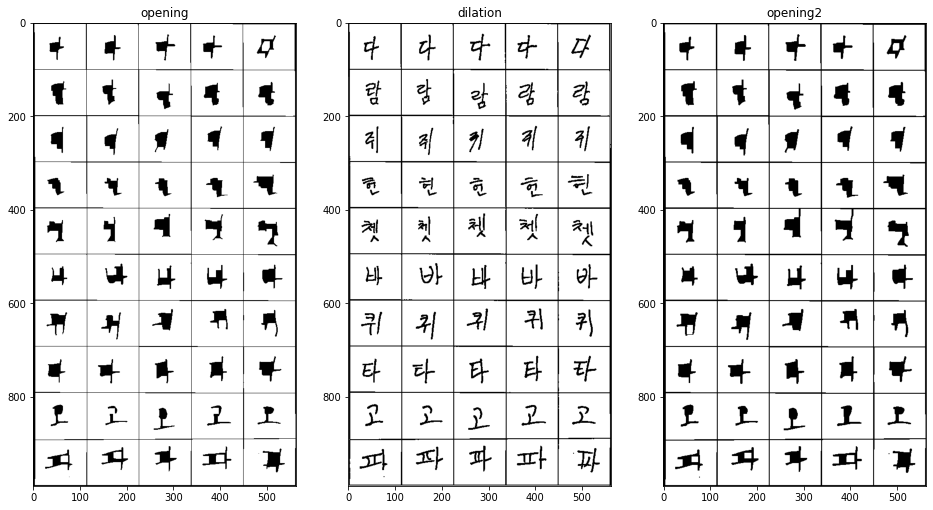

In [381]:
kernel1 = np.ones((12,12) ,np.uint8)
opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel1)

test = copy.deepcopy(thresh2)
kernel2 = np.ones((2,2) ,np.uint8)
dilation = cv2.erode(test, kernel2, iterations=1)

opening2 = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel1)

plt.figure(figsize = (16,16))

plt.subplot(1, 3, 1)
plt.title("opening")
plt.imshow(opening, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.title("dilation")
plt.imshow(dilation, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("opening2")
plt.imshow(opening2, cmap = 'gray')

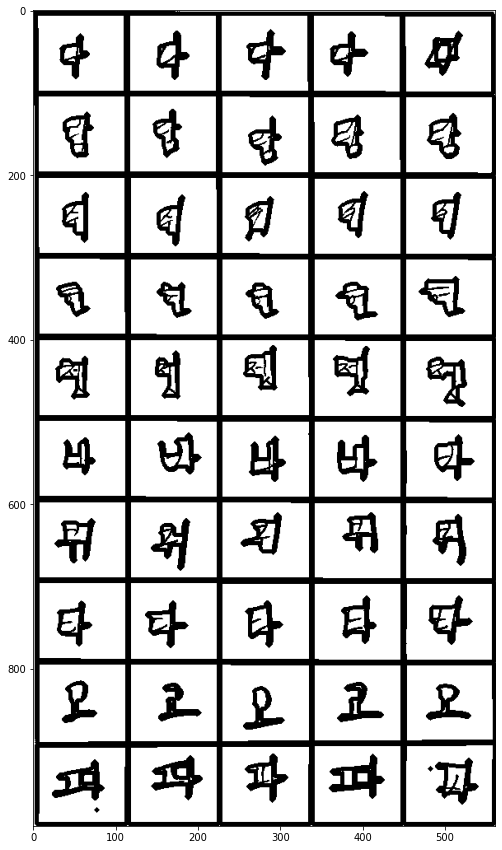

In [382]:
img_original = copy.deepcopy(thresh2)
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_contour = cv2.drawContours(img_original, contours, -1, (0, 255, 0), 3)
plt.figure(figsize = (15,15))
plt.imshow(img_contour, cmap = 'gray')

In [383]:
img_temp = copy.deepcopy(thresh2)
img_orig = copy.deepcopy(thresh2)

In [384]:
contour_pos = []

# 면적이 2000 이하인 Contour 영역은 제거
for pos in range(len(contours)):
    area = cv2.contourArea(contours[pos])
    if area < 9000 and area > 400:
        contour_pos.append(pos)

# 면적 부분 오려내기
for pos in contour_pos:
    x, y, w, h = cv2.boundingRect(contours[pos])
    img_crop = img_temp[y:y + h, x:x + w]
    # 테스트
    # plt.figure(figsize = (15,15))
    # plt.imshow(img_crop, cmap = 'gray')

In [387]:
folder = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num1= 0
num2 = 0
for p in contour_pos:
    img_temp = copy.deepcopy(thresh2)
    img_orig = copy.deepcopy(thresh2)
    x, y, w, h = cv2.boundingRect(contours[p])

    cnt = contours[p]
    area = cv2.contourArea(cnt)

    area_box = w*h

    img_contour = cv2.drawContours(img_orig, contours, p, (0, 255, 0), 1)

    cnt = contours[p]
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    # 좁게 추출
    #for i in range(y, y + h):
    #    px_lst = img_contour[i]
    #    for j in range(x, x + w):
    #        if (px_lst[j] == [0, 255, 0]).all():
    
    #            cv2.line(img_contour, (j, i), (cx, cy), (1, 2, 3), 2)

    # img_crop = img_contour[y:y + h, x:x + w]

    # 배경 날리기
    for i in range(y, y + h):
        px_lst = img_contour[i]
    

    img_save = img_temp[y:y + h, x:x + w]
    
    cv2.imwrite("./test3/{}/img_{}.png".format(folder[num2], p), img_save)
    num1 +=1
    if (num1 > 4):
        num1 = 0
        num2 += 1
    #if (num % 5 != 0):
        
    

In [ ]:
len(folder)

10

In [ ]:
cnt

array([[[66, 39]],

       [[68, 39]],

       [[70, 41]],

       [[70, 47]],

       [[69, 48]],

       [[69, 60]],

       [[76, 60]],

       [[77, 61]],

       [[77, 65]],

       [[76, 66]],

       [[75, 66]],

       [[74, 67]],

       [[72, 67]],

       [[71, 68]],

       [[68, 68]],

       [[65, 71]],

       [[65, 76]],

       [[64, 77]],

       [[64, 91]],

       [[63, 92]],

       [[60, 92]],

       [[58, 90]],

       [[58, 75]],

       [[46, 75]],

       [[44, 73]],

       [[44, 72]],

       [[43, 71]],

       [[43, 69]],

       [[44, 68]],

       [[44, 59]],

       [[43, 58]],

       [[43, 55]],

       [[45, 53]],

       [[49, 53]],

       [[50, 52]],

       [[55, 52]],

       [[56, 51]],

       [[63, 51]],

       [[63, 42]]], dtype=int32)

In [ ]:
folder[0]

'파'

In [394]:
img_original[1:100,]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

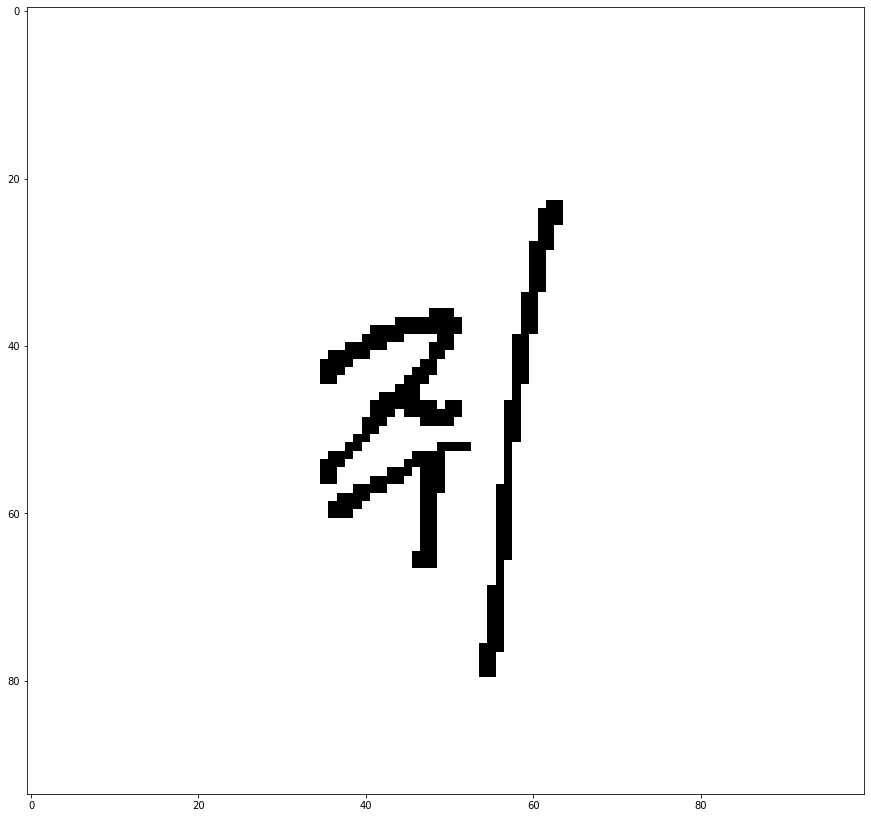

In [411]:
img_original = cv2.imread('img_save_81.png')
plt.figure(figsize = (15, 15))
#plt.imshow(img_original)
plt.imshow(img_original[1:95,:100])

In [ ]:
38*38